<a href="https://colab.research.google.com/github/Pranjal10052000/RL-homework-1/blob/main/RL_Homework_1_Pranjal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Callable
from enum import IntEnum


class Action(IntEnum):
    """Action"""

    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3


def actions_to_dxdy(action: Action):
    """
    Helper function to map action to changes in x and y coordinates

    Args:
        action (Action): taken action

    Returns:
        dxdy (Tuple[int, int]): Change in x and y coordinates
    """
    mapping = {
        Action.LEFT: (-1, 0),
        Action.DOWN: (0, -1),
        Action.RIGHT: (1, 0),
        Action.UP: (0, 1),
    }
    return mapping[action]


def reset():
    """Return agent to start state"""
    return (0, 0)




In [3]:
# Q1
def simulate(state: Tuple[int, int], action: Action):
    """Simulate function for Four Rooms environment

    Implements the transition function p(next_state, reward | state, action).
    The general structure of this function is:
        1. If goal was reached, reset agent to start state
        2. Calculate the action taken from selected action (stochastic transition)
        3. Calculate the next state from the action taken (accounting for boundaries/walls)
        4. Calculate the reward

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))
        action (Action): selected action from current agent position (must be of type Action defined above)

    Returns:
        next_state (Tuple[int, int]): next agent position
        reward (float): reward for taking action in state
    """
    # Walls are listed for you
    # Coordinate system is (x, y) where x is the horizontal and y is the vertical direction
    walls = [
        (0, 5),
        (2, 5),
        (3, 5),
        (4, 5),
        (5, 0),
        (5, 2),
        (5, 3),
        (5, 4),
        (5, 5),
        (5, 6),
        (5, 7),
        (5, 9),
        (5, 10),
        (6, 4),
        (7, 4),
        (9, 4),
        (10, 4),
    ]


    # TODO check if goal was reached
    goal_state = (10, 10)
    if state  == goal_state:
      next_state = reset()
      reward = 0            #as the resulting state is not goal state
      return next_state, reward


    # TODO modify action_taken so that 10% of the time, the action_taken is perpendicular to action (there are 2 perpendicular actions for each action)
    import random

    # if random.random() < 0.9:
    #   action_taken = action
    # else:
    if random.random() < 0.1:
      # Select one of the two perpendicular actions
      if action in [Action.LEFT, Action.RIGHT]:
        perpendicular_actions = [Action.DOWN,Action.UP]
        action_taken = random.choice(perpendicular_actions)
      if action in [Action.DOWN, Action.UP]:
        perpendicular_actions = [Action.LEFT, Action.RIGHT]
        action_taken = random.choice(perpendicular_actions)
    else:
      action_taken = action





    #action_taken = action


    # TODO calculate the next state and reward given state and action_taken
    # You can use actions_to_dxdy() to calculate the next state
    # Check that the next state is within boundaries and is not a wall
    # One possible way to work with boundaries is to add a boundary wall around environment and
    # simply check whether the next state is a wall
    next_state = tuple(map(sum, zip(state, actions_to_dxdy(action_taken))))
    x,y = next_state


    if (x <= 10 and y <= 10) and (x >= 0and y >= 0) and (next_state not in walls): # if the next state is with in boundaries
      if next_state  == goal_state:
        reward = 1
        return next_state, reward
      else:
        reward = 0
        return next_state, reward

    else:         # if the next state is not within the boundaries stay in the same state
        next_state = state
        reward = 0
        return next_state, reward




In [15]:

# Q2
def manual_policy(state: Tuple[int, int]):
    """A manual policy that queries user for action and returns that action

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))

    Returns:
        action (Action)
    """
    # TODO
    action = input(f"Current position: {state}. choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): ").strip().upper()
    if action == 'LEFT':
      return Action.LEFT
    elif action == 'DOWN':
      return Action.DOWN
    elif action == 'RIGHT':
      return Action.RIGHT
    elif action == 'UP':
      return Action.UP
    else:
      print("!!Invalid input!! choose action ('LEFT', 'DOWN', 'RIGHT', 'UP') start again")



# Q2
def agent(
    steps: int = 1000,
    trials: int = 1,
    policy=Callable[[Tuple[int, int]], Action],
):
    """
    An agent that provides actions to the environment (actions are determined by policy), and receives
    next_state and reward from the environment

    The general structure of this function is:
        1. Loop over the number of trials
        2. Loop over total number of steps
        3. While t < steps
            - Get action from policy
            - Take a step in the environment using simulate()
            - Keep track of the reward
        4. Compute cumulative reward of trial

    Args:
        steps (int): steps
        trials (int): trials
        policy: a function that represents the current policy. Agent follows policy for interacting with environment.
            (e.g. policy=manual_policy, policy=random_policy)

    """
    if policy == manual_policy:
      policy_name = 'manual_policy'
    elif policy == random_policy:
      policy_name = 'random_policy'
    elif policy == worse_policy:
      policy_name = 'worse_policy'
    elif policy == better_policy:
      policy_name = 'better_policy'
    # TODO you can use the following structure and add to it as needed
    state = (0,0) #initializing the state
    cumulative_reward = []
    for t in range(trials):
        state = reset()
        i = 0
        sum_reward = 0
        trial_reward = [0]

        while i < steps:
            # TODO select action to take
            action = policy(state)            #doubt: will state be given?
            # TODO take step in environment using simulate()
            next_state, reward = simulate(state, action)

            # TODO record the reward
            sum_reward += reward
            trial_reward.append(sum_reward)
            i +=1
            state = next_state

        #plt.plot(cumulative_reward, label='random_policy agent trial {}'.format(t))
        plt.plot(trial_reward, linestyle='--')
        cumulative_reward.append(trial_reward)

    random_color = np.random.rand(3,)
    cumulative_reward_array = np.array(cumulative_reward)
    cumulative_reward_averages = list(np.mean(cumulative_reward_array, axis=0))
    plt.plot(cumulative_reward_averages,color=random_color, linewidth=2, label = 'Average reward {}'.format(policy_name))

    plt.xlabel('steps')
    plt.ylabel('cumulative_reward')
    plt.title('cumulative reward for {}'.format(policy_name))
    plt.legend()
    #plt.show()





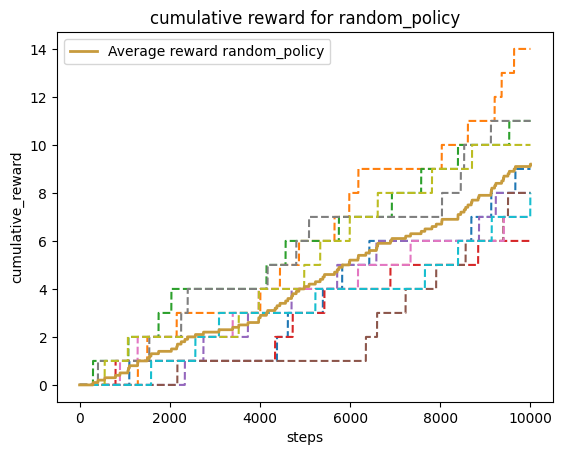

In [16]:
agent(10000,10,random_policy)
plt.show()

Current position: (0, 0). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): right
Current position: (1, 0). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): right
Current position: (2, 0). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): right
Current position: (3, 0). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): right
Current position: (4, 0). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): right
Current position: (4, 0). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): up
Current position: (4, 1). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): up
Current position: (4, 2). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): up
Current position: (4, 3). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): up
Current position: (3, 3). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): up
Current position: (3, 4). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): right
Current position: (4, 4). choose action ('LEFT', 'DOWN', 'RIGHT', 'UP'): right
Current position: (4, 4). choose action ('LEFT', 'DOWN', 'RIGHT', '

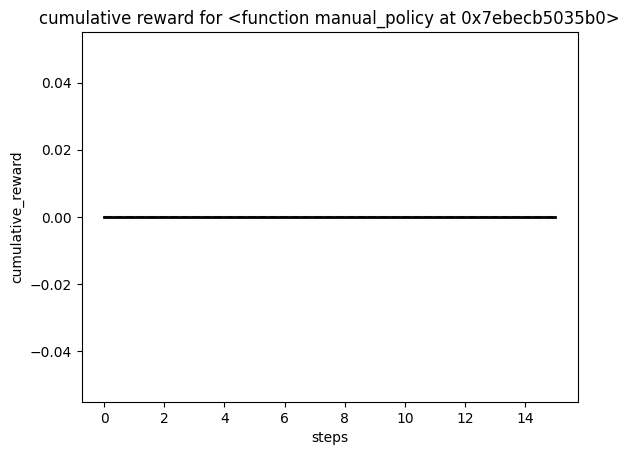

In [27]:
agent(15,1,manual_policy)


In [6]:
# Q3
import random
def random_policy(state: Tuple[int, int]):
    """A random policy that returns an action uniformly at random

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))

    Returns:
        action (Action)
    """
    # TODO
    return random.choice([Action.LEFT, Action.DOWN, Action.RIGHT, Action.UP])





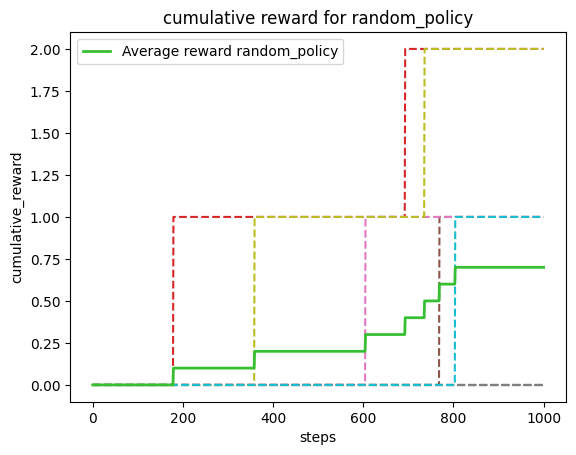

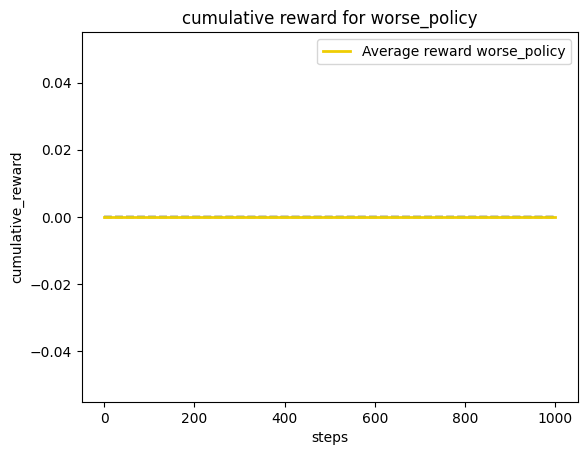

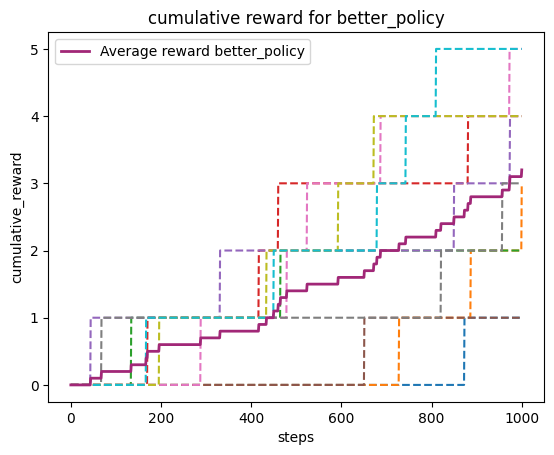

In [19]:
# Q4
def worse_policy(state: Tuple[int, int]):
    """A policy that is worse than the random_policy

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))

    Returns:
        action (Action)
    """
    # TODO
    #policy that will do same action always
    return Action.RIGHT


# Q4
def better_policy(state: Tuple[int, int]):
    """A policy that is better than the random_policy

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))

    Returns:
        action (Action)
    """
    # TODO
    actions = [Action.LEFT, Action.DOWN, Action.RIGHT, Action.UP]
    weights = [0.1,0.1,0.4,0.4]
    return random.choices(actions, weights, k=1)[0]
    pass


def main():
    # TODO run code for Q2~Q4 and plot results
    # You may be able to reuse the agent() function for each question
    agent(1000,10,random_policy)
    plt.show()

    agent(1000,10,worse_policy)
    plt.show()

    agent(1000,10, better_policy)
    plt.show()




    #pass


if __name__ == "__main__":
    main()

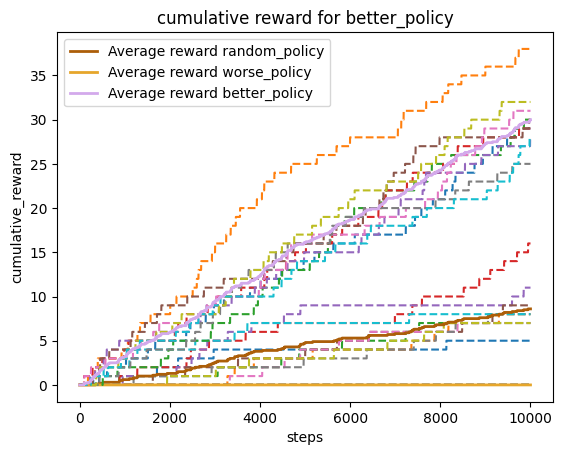

In [21]:
agent(10000,10,random_policy)
agent(10000,10,worse_policy)
agent(10000,10, better_policy)
plt.legend()
plt.show()